# Principal Components Analysis

Principal Components Analysis (PCA) is a matrix-based technique for identifying the most interesting dimensions of a dataset. Mathematically, PCA finds the projection that maximizes the variance of the data. 

Remember the example we've seen of generating points from a normal distribution in $n$ dimensions?

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: covariance is not positive-semidefinite.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: covariance is not positive-semidefinite.
  # Remove the CWD from sys.path while we load stuff.


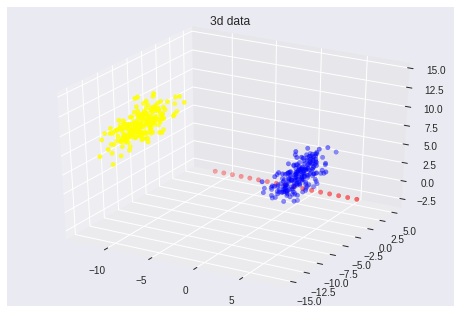

In [2]:
# LAMBDA SCHOOL
#
# MACHINE LEARNING
#
# MIT LICENSE

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

x = np.linspace(-8,8,17)
Z = np.repeat(np.array([1,0,0]).reshape(1,3),17,axis=0).T * x

points1 = np.random.multivariate_normal([1,1,1],[[1,0.1,2],[0.1,1,1.5],[1,2,1]],200)
points2 = np.random.multivariate_normal([-10,-10,10],[[1,0.1,2],[0.1,1,1.5],[1,2,1]],200)

colors = np.concatenate([np.repeat('red',17),np.repeat('blue',200),np.repeat('yellow',200)])

from mpl_toolkits.mplot3d import Axes3D

all_points = np.concatenate([Z.T,points1,points2],axis=0)
xa, ya, za = all_points.T

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xa, ya, za, c=colors)
ax.set_title('3d data');

In $2d$ and $3d$ we can visualize these distributions and intuit them, but what do we do in $15d$, or greater? Frequently there are large numbers of dimensions in a high dimensional dataset that don't contribute much to the shape of the dataset. PCA gives us the ability to expose the covariance of each dimension, which vastly improves visualization techniques and can decrease the dimensionality of a dataset substantially.


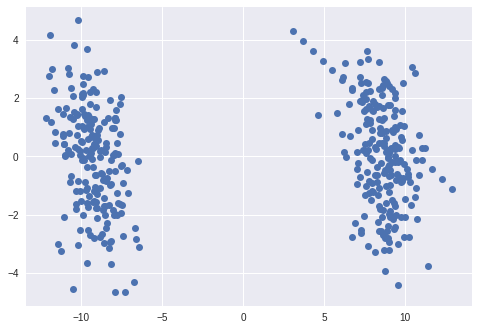

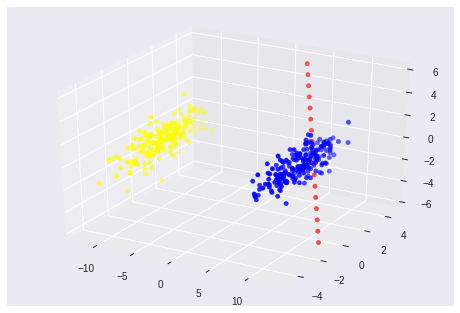

In [3]:
# Principal Components Analysis

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
 
model = PCA(n_components=2)
model.fit(all_points)
X_2D = model.transform(all_points)
#print(model.components_)
#print(np.sqrt(model.singular_values_))
#print(model.get_covariance())
xx, xy = X_2D.T
plt.plot(xx,xy,'o')

model = PCA(n_components=3)
model.fit(all_points)
X_3D = model.transform(all_points)
#print(model.components_)
#print(np.sqrt(model.singular_values_))
#print(model.get_covariance())
xx, xy, xz = X_3D.T

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xx, xy, xz, c=colors);

In [6]:
# Principal Components Analysis

import pandas as pd
from sklearn.decomposition import PCA

model = PCA(n_components=2)
model.fit(all_points)
X_2D = model.transform(all_points)
print(model.components_, '\n')
print(np.sqrt(model.singular_values_), '\n')
print(model.get_covariance())


[[ 0.61401652  0.61918315 -0.48948539]
 [-0.33983971 -0.35233496 -0.87199143]] 

[13.55757743  6.06297448] 

[[ 31.74099728  30.53044508 -23.4404939 ]
 [ 30.53044508  32.26445361 -23.6228012 ]
 [-23.4404939  -23.6228012   21.92865225]]


# Assignment

Looking back at your carefully prepared and cleaned Titanic data, lets use PCA to look at the 2d and 3d projections of all of the features.

Use the example code above to create a PCA object with 2 components and plot the full 8D Titanic feature set using them. This projection maximizes the variance across all dimensions in your dataset. Without creating new features, this is the best "viewport" into the Titanic data that is available.

Do the same thing with a 3 component PCA and discuss the results.

Finally, experiment with the normalization techniques available in [scikit.preprocessing.normalize](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html) on the original dataset before building your PCA. Does normalization appear to benefit?



# Search terms

Other than the final question involving normalization, all of the techniques required for this assignment should be available here and in the previous assignments.

* scikit normalize data
* effects of normalizing data on PCA


# Thinking about your assignment

__What is PCA, mathematically?__

Principal Components Analysis seeks to find a projection from an N-dimensional space within which data is being represented, to another space of equal or smaller dimensions. The axes defined by the individual spans of the basis vectors in this new space have the following properties:

* They are orthogonal to one another (having a dot product of zero)
* They are the eigenvectors of the eigendecomposition of the data's covariance matrix

The principal components can also be obtained by performing a Singular Value Decomposition on the data matrix.

There is a meaningful way of ordering these bases, hereafter referred to as principal components. The First Principal Component is the eigenvector corresponding to the highest valued eigenvalue of the covariance matrix, the Second Principal Component corresponds to the second-highest valued eigenvalue, and so on. When PCA is done using less principal components than the original dimension of the data, the components are selected from this order (for example, projecting 8D data onto a 3D space using PCA will mean that the axes of the new space are the first, second, and third principal components, rather than, say, the 5th, 3rd, and 8th).


__What does PCA do to a data set?__

The data, when projected onto its principal components, displays these properties:

* Its variance along the first principal component is maximized. A projection onto any other vector in the original space will have lesser variance.
* Its variance along the second principal component is maximized for all possible vectors orthogonal to the first principal component. This property extends to the remaining principal components.

__What "shape" does data have?__

Most data can be represented by a matrix. One dimension of the matrix corresponds to the individual samples of data. The other dimension is then the number of features each data point has. This corresponds to the dimension of the vector space within which the data "lives".

__What steps are in the above PCA example?__

The above example shows how a practitioner would implement PCA using programming libraries. The `sklearn` workflow is remarkably standardized across all sorts of models and operations. It consists of the following steps:

1. Instantiate the object that performs the desired analysis (in our case, PCA)
2. Fit the model to the data (for PCA, this amounts to finding the singular values - a measure of the variance along the compoents, and the pricipal components themselves)
3. Use the fitted model to transform the data (for PCA, this is the step that actually projects the original data onto the space with the principal components as basis vectors)

__What steps must I duplicate to apply PCA to Titanic?__

I can use the 3-step `sklearn` pipeline without modification as long as my Titanic data can be represented as a set of vectors occupying some vector space. For this to be true, I must encode my categorical variables using integer/real-number labels, or using one-hot encoding.

__Where is my Titanic dataset, and how can I use it here effectively?__

In [previous assignments](https://github.com/rayheberer/LambdaSchoolDataScience/blob/master/Week%203%20High%20Dimensionality/High%20Dimensional%20Data.ipynb), the dataset could be loaded from the [Seaborn library](https://seaborn.pydata.org/). The preprocessing done in that assignment can be repeated.

As part of this preprocessing, the data was rescaled so that no particular dimension would contribute disproportionately to any particular distance between pairs of points. The same sort of preprocessing is well-motivated for preparing data for Principal Components Analysis. In this case, this is because the covariance matrix is sensitive to the scale of the individual dimensions. For similar reasons, centering the data is also important.

Some common methods of rescaling and centering data include (using the terminology conventions of sklearn):

* Standardizing: rescaling features to have unit variance, and mean zero.
* Normalizing (Z-score normalization): rescaling vectors (samples in data) to have unit norm
* Min-Max Scaling: rescaling features to fall between a designated minimum and maximum value

Normalizing in this context is not appropriate, since it will cause all the data to occupy a hypersphere of radius one. I will standardize the data, since it will make for meaningful comparison, especially if all data was generated from similar probability distributions.

__What is my final objective in this assignment?__

My objective is to project the Titanic data onto both its first two principal components, and its first three principal components. In both cases, I will visualize the projected data, and compare it to some plots made simply by feature selection, or by transforming the data with an [orthographic projection](https://en.wikipedia.org/wiki/Orthographic_projection) matrix.

# Stretch Goal

## Eigenfaces

One of the most interesting ways to understand PCA involves image processing. As you know, every image is in fact a single high dimensional point where each pixel is a dimension of the point. When presented with a collection of $m$ images in $n$ dimensions, where $n$ is the number of pixels per image, PCA produces a very interesting set of components.

The first component, know is the first eigenvector, is the set of most frequent characteristics of a face from this dataset. Every face starts with this eigenface, then adds components of the other eigenfaces to produce each unique face.

In [0]:
!wget http://www.cl.cam.ac.uk/Research/DTG/attarchive/pub/data/att_faces.zip -O att_faces.zip
!unzip att_faces.zip

(112, 92)
[0.188 0.192 0.176 0.184 0.192 0.224 0.153 0.165 0.208 0.192 0.208 0.235
 0.298 0.357 0.388 0.373 0.314 0.294 0.259 0.212 0.184 0.192 0.196 0.169
 0.18  0.208 0.239 0.275 0.329 0.412 0.522 0.51  0.431 0.369 0.318 0.42
 0.373 0.314 0.224 0.216 0.259 0.337 0.314 0.29  0.255 0.278 0.243 0.329
 0.204 0.29  0.278 0.263 0.251 0.345 0.267 0.278 0.294 0.259 0.224 0.239
 0.243 0.204 0.184 0.196 0.227 0.235 0.251 0.259 0.224 0.18  0.212 0.259
 0.314 0.314 0.267 0.278 0.341 0.251 0.302 0.259 0.325 0.302 0.227 0.18
 0.161 0.169 0.22  0.216 0.2   0.22  0.22  0.212]


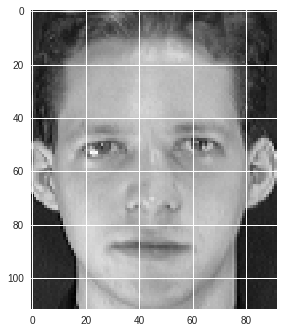

In [0]:
from scipy.misc import imread
import matplotlib.pyplot as plt
img = imread('s1/1.pgm')
img = img.astype(np.uint8)
img = img / 255
plt.imshow(img,cmap='gray')

![AT&T](https://www.dropbox.com/s/w9cvhuzyamme68q/Screenshot%202018-04-17%2015.01.38.png?raw=1)